Este notebook traz análises referentes quantidade de internações que tiveram alta por óbito, nas AIH aprovadas no período no Brasil. Mais precisamente a quantidade de óbitos por ano/mês de atendimento segundo Unidade da Federação no período Jan/2008-Set/2021.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [61]:
#obitos = pd.read_csv("/content/óbitos.csv", encoding="ISO-8859-1", 
#                    skiprows = 3, sep=";", skipfooter=12,
#                    thousands=".", decimal=",")

URL = 'https://raw.githubusercontent.com/777dan777/bootcampalura_datascience/M%C3%B3dulo-1/%C3%B3bitos.csv'
internacoes_nao_pub = pd.read_csv(URL, encoding='ISO-8859-1', skiprows=3, skipfooter=12, sep=';', 
                                   thousands = ".", decimal=",", engine='python')

#tratamento obitos = obitos.set_index("Unidade da Federação") 
obitos = obitos.replace('-', 0)  #retirando os hífens
obitos_ordenados = obitos.sort_values("Total", ascending=False) #ordenar
obitos_ordenados = obitos_ordenados.drop("Total", axis=1)  #retirando coluna total
obitos_ordenados.head()


,Unidade da Federação,1998/Ago,1998/Set,1999/Set,1999/Out,2000/Jan,2001/Dez,2002/Out,2004/Jul,2005/Nov,2007/Jan,2007/Fev,2007/Mar,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
19,35 São Paulo,1,1,1,1,1,1,1,1,1,1,0,1,0,2,5,39,152,508,1460,4511,9173,7477,8089,7993,9107,9007,9637,8848,8661,9003,7872,8011,8136,7383,8577,8317,8785,9649,10144,...,11222,11028,10798,10053,10161,9903,10388,10658,9058,10122,10252,11207,11477,11954,11070,10641,10685,9623,10399,10689,9687,10889,11726,13762,13748,14543,13732,12266,12123,11381,12553,14203,13435,22672,19483,19639,17979,14117,11057,5698
16,31 Minas Gerais,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,22,88,462,971,2301,3833,3328,3605,3650,3768,3788,4231,3805,3691,3855,3506,3765,3941,3470,3784,3796,3978,3935,4248,...,5024,5086,5054,4660,4750,4538,4733,4774,4235,4766,4867,5249,5155,5593,5352,4959,4929,4614,4763,4931,4438,4746,4213,4839,5318,6139,6271,5793,5722,5130,5927,6829,6223,10585,9387,8626,7458,6102,4484,2236
18,33 Rio de Janeiro,0,0,0,0,0,0,0,0,0,0,1,0,1,0,3,22,47,174,511,1248,2939,2185,2349,2409,2657,2528,2573,2455,2534,2492,2229,2284,2457,2254,2456,2526,2614,2869,2920,...,4308,4180,4400,3783,3859,3798,3977,4268,3662,3977,4213,4539,4301,4471,4365,4077,4175,3853,3894,4161,3663,3918,5291,6527,5075,5124,5237,4898,4703,5273,6129,5693,4618,7493,7986,6875,5471,5153,4659,2143
22,43 Rio Grande do Sul,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,12,68,235,400,1398,2314,2248,2441,2423,2724,2881,2809,2747,2771,2699,2516,2566,2582,2202,2458,2460,2637,2996,3449,...,3759,3999,3891,3307,3235,2959,3023,3231,2691,2989,3015,3366,3424,4171,3953,3508,3282,3059,3073,3170,2898,2900,2784,3212,3496,4310,4093,3836,3648,3874,4355,4192,4807,8571,5410,5217,4908,4070,2654,1041
20,41 Paraná,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,50,188,448,1301,1856,1813,1899,1958,2102,2119,2276,2033,2081,2157,2046,1996,2087,1940,2158,1999,2196,2482,2506,...,3089,3141,3045,2673,2770,2657,2730,2825,2383,2788,2749,2909,2986,3045,3043,2876,2907,2777,2834,2815,2656,2812,2640,2873,3249,3725,3638,3426,3255,3610,4030,3988,4110,6604,5647,6020,5378,3409,2284,898


In [62]:

#internacoes = pd.read_csv("/content/internaçoes.csv", encoding="ISO-8859-1", 
#                    skiprows = 3, sep=";", skipfooter=12,
#                    thousands=".", decimal=",")
URL = 'https://raw.githubusercontent.com/777dan777/bootcampalura_datascience/M%C3%B3dulo-1/interna%C3%A7oes.csv'
internacoes_nao_pub = pd.read_csv(URL, encoding='ISO-8859-1', skiprows=3, skipfooter=12, sep=';', 
                                   thousands = ".", decimal=",", engine='python')

#tratamento internacoes = internacoes.set_index("Unidade da Federação") 
internacoes = internacoes.replace('-', 0)  #retirando os hífens
internacoes_ordenados = internacoes.sort_values("Total", ascending=False) #ordenar
internacoes_ordenados = internacoes_ordenados.drop("Total", axis=1)  #retirando coluna total
internacoes_ordenados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
19,35 São Paulo,125361,155799,169738,178746,200439,193555,202386,194738,197277,194543,174370,175203,162995,168100,194928,185550,197319,194082,198671,198792,199606,196425,194467,182073,187926,179027,201359,202648,200028,195168,196112,198949,201568,192603,197354,199177,188683,190234,201161,...,205117,207804,212547,203113,212083,201634,197493,205741,197814,211776,215876,221498,210518,215641,221298,211684,220411,206022,198920,210257,199907,202819,152829,157924,166932,181606,179389,185979,191035,190248,183122,190766,185676,193307,186260,195406,194247,192684,191922,184496
16,31 Minas Gerais,67509,89738,96161,93949,96064,106686,98481,98257,97953,99139,92486,88366,89661,88228,95288,94012,97785,93841,96457,95970,93654,94019,93239,88630,92208,87723,96678,95532,97640,94005,95503,96049,93876,93454,93686,93491,93602,90607,96079,...,104455,106719,105993,104207,104381,100308,100591,102961,101140,105009,108390,114829,107579,112079,110444,106238,110323,103008,101580,106343,100741,96006,82408,84314,82841,89641,90322,92631,95148,93953,91429,93428,93702,97886,96945,100687,101341,102466,101675,92541
15,29 Bahia,41659,51637,59728,74525,79931,85057,79247,78254,76724,74851,63977,64117,59066,67772,76268,75434,73385,74149,74643,75731,77724,74097,75297,72183,72140,69770,78278,76347,77704,71710,74721,77307,74047,74413,73161,70517,71598,68869,75969,...,67633,70644,71435,69110,71748,69032,63120,66492,63225,68055,71040,73056,70093,74281,75517,72442,72753,69743,65872,66185,64972,65715,54100,51775,51219,54336,55052,56477,61326,61134,59194,55660,56001,61831,63405,63532,65296,65285,63173,59679
20,41 Paraná,51180,61926,63178,60734,60660,63040,62952,61885,62168,63107,58092,60592,61571,60535,64642,64514,65056,63470,65637,64540,64183,64462,62807,63107,60926,60085,65432,65822,66503,65982,65939,66679,66009,65749,65832,63829,64757,62518,63744,...,72760,74451,74103,73357,74028,74335,69396,72424,70915,72807,72330,75849,73282,75158,73834,74501,74980,74003,69531,72379,73852,67487,55136,59843,51876,55264,58442,59155,63596,62996,56910,58814,63332,60428,63350,62625,63456,64149,66052,51625
22,43 Rio Grande do Sul,41729,64477,61229,64063,56673,58261,64280,63316,61107,61707,57058,58889,54306,55841,62681,62314,61609,61481,63836,64022,62577,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,...,62037,64053,64525,63580,62715,61241,59573,59533,59283,60253,62291,65673,65334,68165,68263,65798,68534,62678,61288,63760,61605,63508,50991,50177,50998,53202,52509,52539,59214,57284,55811,56763,54329,55963,55324,57913,59664,59396,60304,58660


In [19]:
obitos_ordenados.mean()
periodo_escolhido = obitos_ordenados.mean().index.tolist()   #observar quais colunas nao estao em branco
periodo_escolhido


['2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',

In [27]:
 periodo_escolhido = ['2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez', '2021/Jan',
 '2021/Fev', '2021/Mar', '2021/Abr', '2021/Mai'] #Data escolhida para analisar aumento de óbitos e atendimentos na pandemia.
periodo_escolhido.insert(0, "Unidade da Federação")
periodo_escolhido

['Unidade da Federação',
 '2020/Jan',
 '2020/Fev',
 '2020/Mar',
 '2020/Abr',
 '2020/Mai',
 '2020/Jun',
 '2020/Jul',
 '2020/Ago',
 '2020/Set',
 '2020/Out',
 '2020/Nov',
 '2020/Dez',
 '2021/Jan',
 '2021/Fev',
 '2021/Mar',
 '2021/Abr',
 '2021/Mai']

In [44]:
obitos_filtrado = obitos_ordenados[periodo_escolhido]
obitos_filtrado.set_index("Unidade da Federação", inplace=True)
obitos_filtrado.head()

,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai
Unidade da Federação,,,,,,,,,,,,,,,,,
35 São Paulo,10689,9687,10889,11726,13762,13748,14543,13732,12266,12123,11381,12553,14203,13435,22672,19483,19639
31 Minas Gerais,4931,4438,4746,4213,4839,5318,6139,6271,5793,5722,5130,5927,6829,6223,10585,9387,8626
33 Rio de Janeiro,4161,3663,3918,5291,6527,5075,5124,5237,4898,4703,5273,6129,5693,4618,7493,7986,6875
43 Rio Grande do Sul,3170,2898,2900,2784,3212,3496,4310,4093,3836,3648,3874,4355,4192,4807,8571,5410,5217
41 Paraná,2815,2656,2812,2640,2873,3249,3725,3638,3426,3255,3610,4030,3988,4110,6604,5647,6020


In [31]:
internacoes_filtrado = internacoes_ordenados[periodo_escolhido]
internacoes_filtrado.set_index("Unidade da Federação", inplace=True)
internacoes_filtrado.head()

,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai
Unidade da Federação,,,,,,,,,,,,,,,,,
35 São Paulo,210257,199907,202819,152829,157924,166932,181606,179389,185979,191035,190248,183122,190766,185676,193307,186260,195406
31 Minas Gerais,106343,100741,96006,82408,84314,82841,89641,90322,92631,95148,93953,91429,93428,93702,97886,96945,100687
29 Bahia,66185,64972,65715,54100,51775,51219,54336,55052,56477,61326,61134,59194,55660,56001,61831,63405,63532
41 Paraná,72379,73852,67487,55136,59843,51876,55264,58442,59155,63596,62996,56910,58814,63332,60428,63350,62625
43 Rio Grande do Sul,63760,61605,63508,50991,50177,50998,53202,52509,52539,59214,57284,55811,56763,54329,55963,55324,57913


**TOP 5 Estados em ÓBITOS**

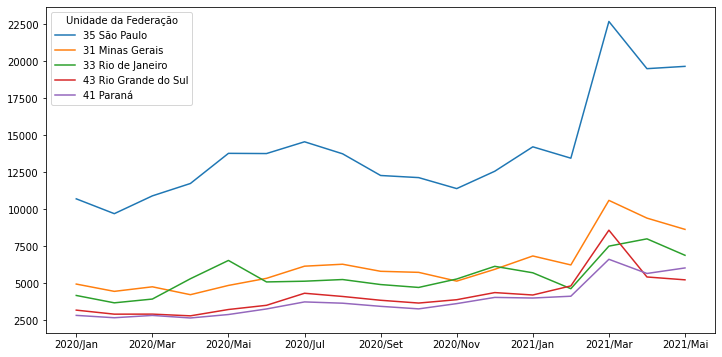

In [49]:
obitos_filtrado.head().T.plot(figsize=(12,6))

**TOP 5 Estados em Internações**

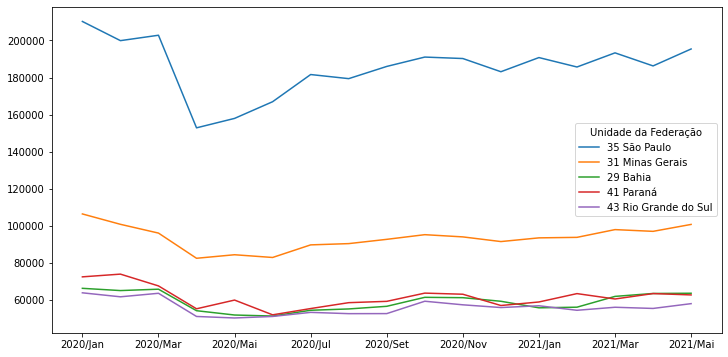

In [48]:
internacoes_filtrado.head().T.plot(figsize=(12,6))

Análise entre ÓBITOS e INTERNAÇÕES.

Período selecionado: Jan2020 até Mai2021 (limitei a maio por conta da possibilidade de alguns valores "recentes" estarem processando).
Sortei a amostra pelos estados com maior quantidade de óbitos e maior quantidade de internaçoes.
Comparando as duas é possível perceber que existe diferença entre os TOP5 Internaçoes e TOP5 Óbitos.

Para óbitos: **SP**, **MG**, RJ, **RS e PR**. 

Para internações: **SP**, **MG**, BA, **PR e RS**.

De acordo com as notas técnicas do TABNET - DATASUS, Internações são a quantidade de AIH (autorização de internação hospitalar) aprovadas no período, não considerando as de prorrogação (longa permanência).
E os óbitos, a quantidade de internações que tiveram alta por óbito, nas AIH aprovadas no período. 

Percebemos que 4 estados (de 5) se repetem nas análises, o que pode indicar uma correlação entre os dois indicadores (óbitos e internações).

Porém, o estado do RJ está presente no top5 óbitos e não no top5 internações, o que **pode** ser proveniente do grande número de pessoas baleadas e mortas por conta de violência e armas de fogo.





